<a href="https://colab.research.google.com/github/waynesan41/king-county-house-price-data-analysis/blob/main/Final_Project_1_(Wayne).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project

Full Name: Thu Htoo San (Wayne)

School Email: thu.san@bellevuecollege.edu

Personal Email: waynesan41@gmail.com

#First task (Set Up Environment and Config)
1. Create your own KaggleCredentials folder and save your kaggle.json

2. Copy that to your current instance.

3. Set the permission as `chmod 600`

In [ ]:
%pip install kaggle
from google.colab import drive

In [ ]:
# drive.flush_and_unmount()

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
if not os.path.exists('/content/Project 1'):
  os.symlink("/content/drive/MyDrive/CS 310 (Wayne San)/Project 1/P1 Resources", "/content/Project 1")
  # yyyesos.makedirs('/content/drive/MyDrive/CS 310 (Wayne San)/Project 1')

In [ ]:
%mkdir ~/.kaggle

In [ ]:
%cp /content/Project\ 1/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

# Second task (Importing Data)

1. Download the dataset (either from the competition or from the dataset page).
2. Extract the files.
3. Create a folder in MyDrive named `Project 1`.
4. Using the magical command `%cp` move the `unziped` files into the folder `Project 1`.
5. Read these files from the Google Drive using `pandas`.

In [ ]:
! kaggle datasets download harlfoxem/housesalesprediction

Dataset URL: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
License(s): CC0-1.0
  0% 0.00/780k [00:00<?, ?B/s]
100% 780k/780k [00:00<00:00, 188MB/s]


In [ ]:
if not os.path.exists('/content/kc_house_data.csv'):
  ! unzip housesalesprediction.zip

Archive:  housesalesprediction.zip
  inflating: kc_house_data.csv       


In [ ]:
%cp /content/kc_house_data.csv /content/Project\ 1/

In [ ]:
# %matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

houseDf = pd.read_csv('/content/Project 1/kc_house_data.csv')
houseDf.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

## (1) Intruduction

**1.1 Problem statement
Briefly describe the problem and the domain context.**

*ANSWER:* Domain is to the housing market in King County

**1.2 Objective & modeling approach
State your main goal. Indicate the modeling family you expect to use—e.g., regression or classification; supervised or unsupervised—and justify your choice.**

*ANSWER:* Main goal is to predict the house price. And I would use Regression, unsupervised.

**1.3 Data source
Explain where the data comes from (dataset name, origin, and how you accessed it).**

*ANSWER:*
- Dataset name: House Sales in King County, USA
- This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.



## (2) Descriptive Data Analysis (EDA)

**2.1 Data quality
Assess data cleanliness: Are there missing values? Outliers or extreme values? Describe how you detected them and how you will handle them.**

*ANSWER:* No missing value found. There are some columns with outliers but not too extream. The dataset is good enought to perform analysis.

**2.2 Data types & transformations
List the variable types you have (numerical, categorical, boolean, etc.).**

*ANSWER:* Most of the columns are numerical range. There isn't seem to be categories columns.

- **For categorical/boolean features: explain the encoding you’ll use (e.g., one-hot, ordinal, target) and why.**

*ANSWER:*
The Zip Code and the Geo Lat and Long will be a classification problem to prediction since the price base on the ZIP code are not going to be linear.

These following Columns as limited range.

[condition] is 1 to 5

[View] is 0 to 4

One boolean column

[Water Front] Yes / No

- **For numerical features: note any transformations (scaling, normalization, log, binning, etc.) and why they’re appropriate.**


*ANSWER:*

2.1 Check if there are null value in data.

In [ ]:
# houseDf.info()
houseDf.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

2.2 General over view of Min, Max and Mean

In [ ]:
# if 'id' in houseDf.columns:
#   houseDf.set_index('id', inplace=True)
houseDf.describe()
houseDf.describe().loc[['min', 'max', 'mean']]

id         price   bedrooms  bathrooms   sqft_living  \
min   1.000102e+06  7.500000e+04   0.000000   0.000000    290.000000   
max   9.900000e+09  7.700000e+06  33.000000   8.000000  13540.000000   
mean  4.580302e+09  5.400881e+05   3.370842   2.114757   2079.899736   

          sqft_lot    floors  waterfront      view  condition      grade  \
min   5.200000e+02  1.000000    0.000000  0.000000    1.00000   1.000000   
max   1.651359e+06  3.500000    1.000000  4.000000    5.00000  13.000000   
mean  1.510697e+04  1.494309    0.007542  0.234303    3.40943   7.656873   

       sqft_above  sqft_basement     yr_built  yr_renovated       zipcode  \
min    290.000000       0.000000  1900.000000      0.000000  98001.000000   
max   9410.000000    4820.000000  2015.000000   2015.000000  98199.000000   
mean  1788.390691     291.509045  1971.005136     84.402258  98077.939805   

            lat        long  sqft_living15     sqft_lot15  
min   47.155900 -122.519000     399.000000     651.000000  
max   47.777600 -121.315000    6210.000000  871200.000000  
mean  47.560053 -122.213896    1986.552492   12768.455652

These following box plot mostly make sense to me but some of they such as water front, view and rennovate has no box due to its being limited categorica/boolean.

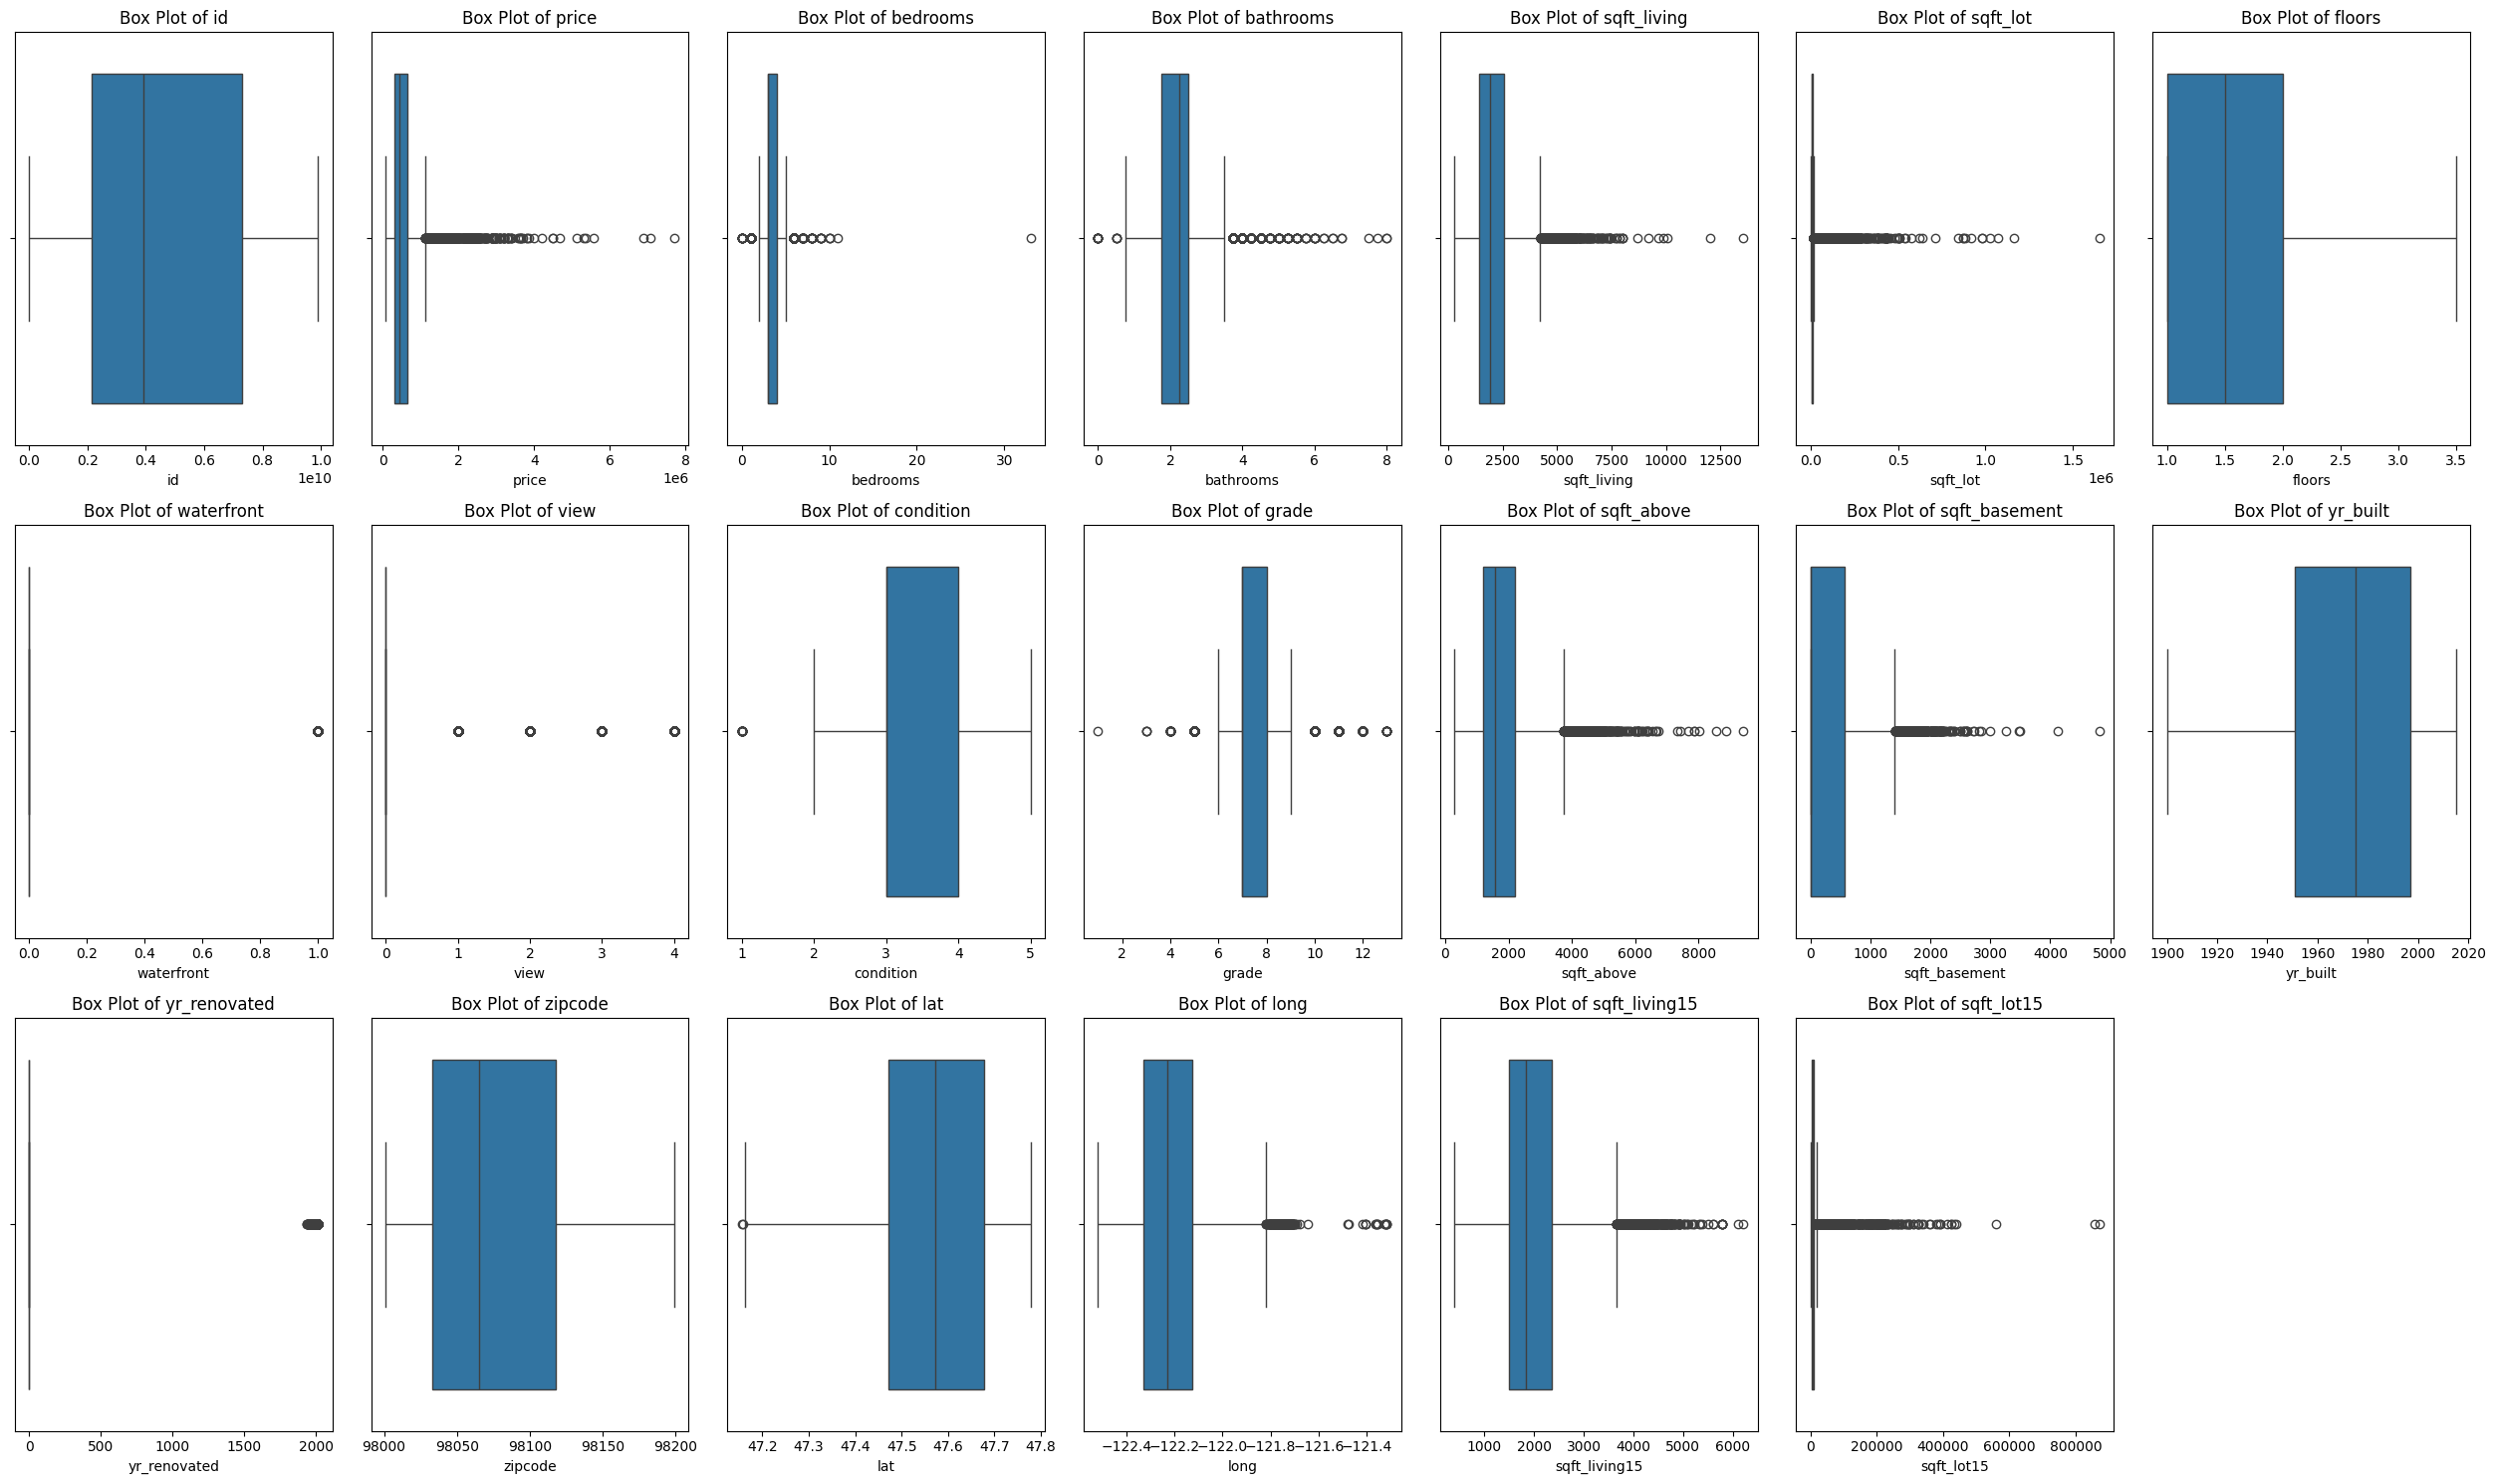

In [ ]:
# Get only numerical columns
numerical_cols = houseDf.select_dtypes(include=np.number).columns.tolist()

# Calculate the number of rows and columns for the subplot grid
n_cols = 7
n_rows = 3
num_plots = len(numerical_cols)

# Adjust grid size if necessary to accommodate all numerical columns
if num_plots > n_rows * n_cols:
    n_rows = (num_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=houseDf[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Normal Distribution of Price

/tmp/ipython-input-1454436426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseDf['price'])


<Axes: xlabel='price', ylabel='Density'>

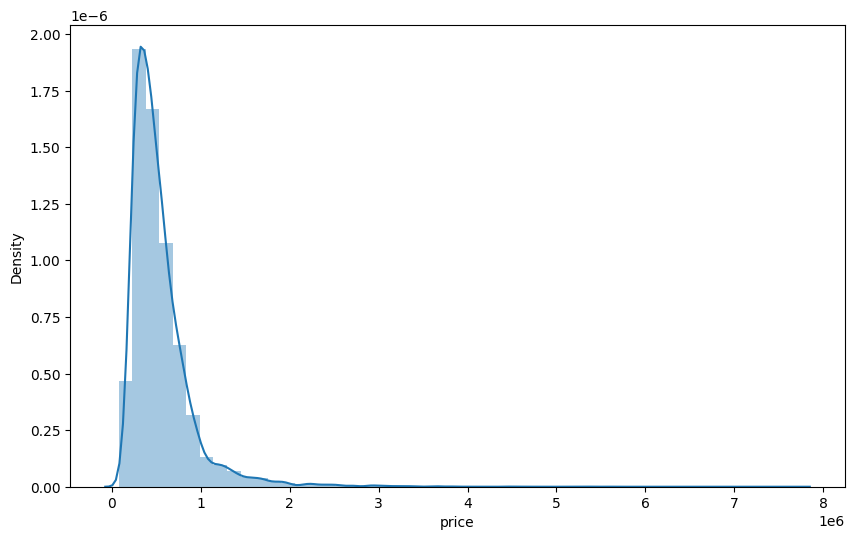

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(houseDf['price'])

Pairplot for whole dataset.

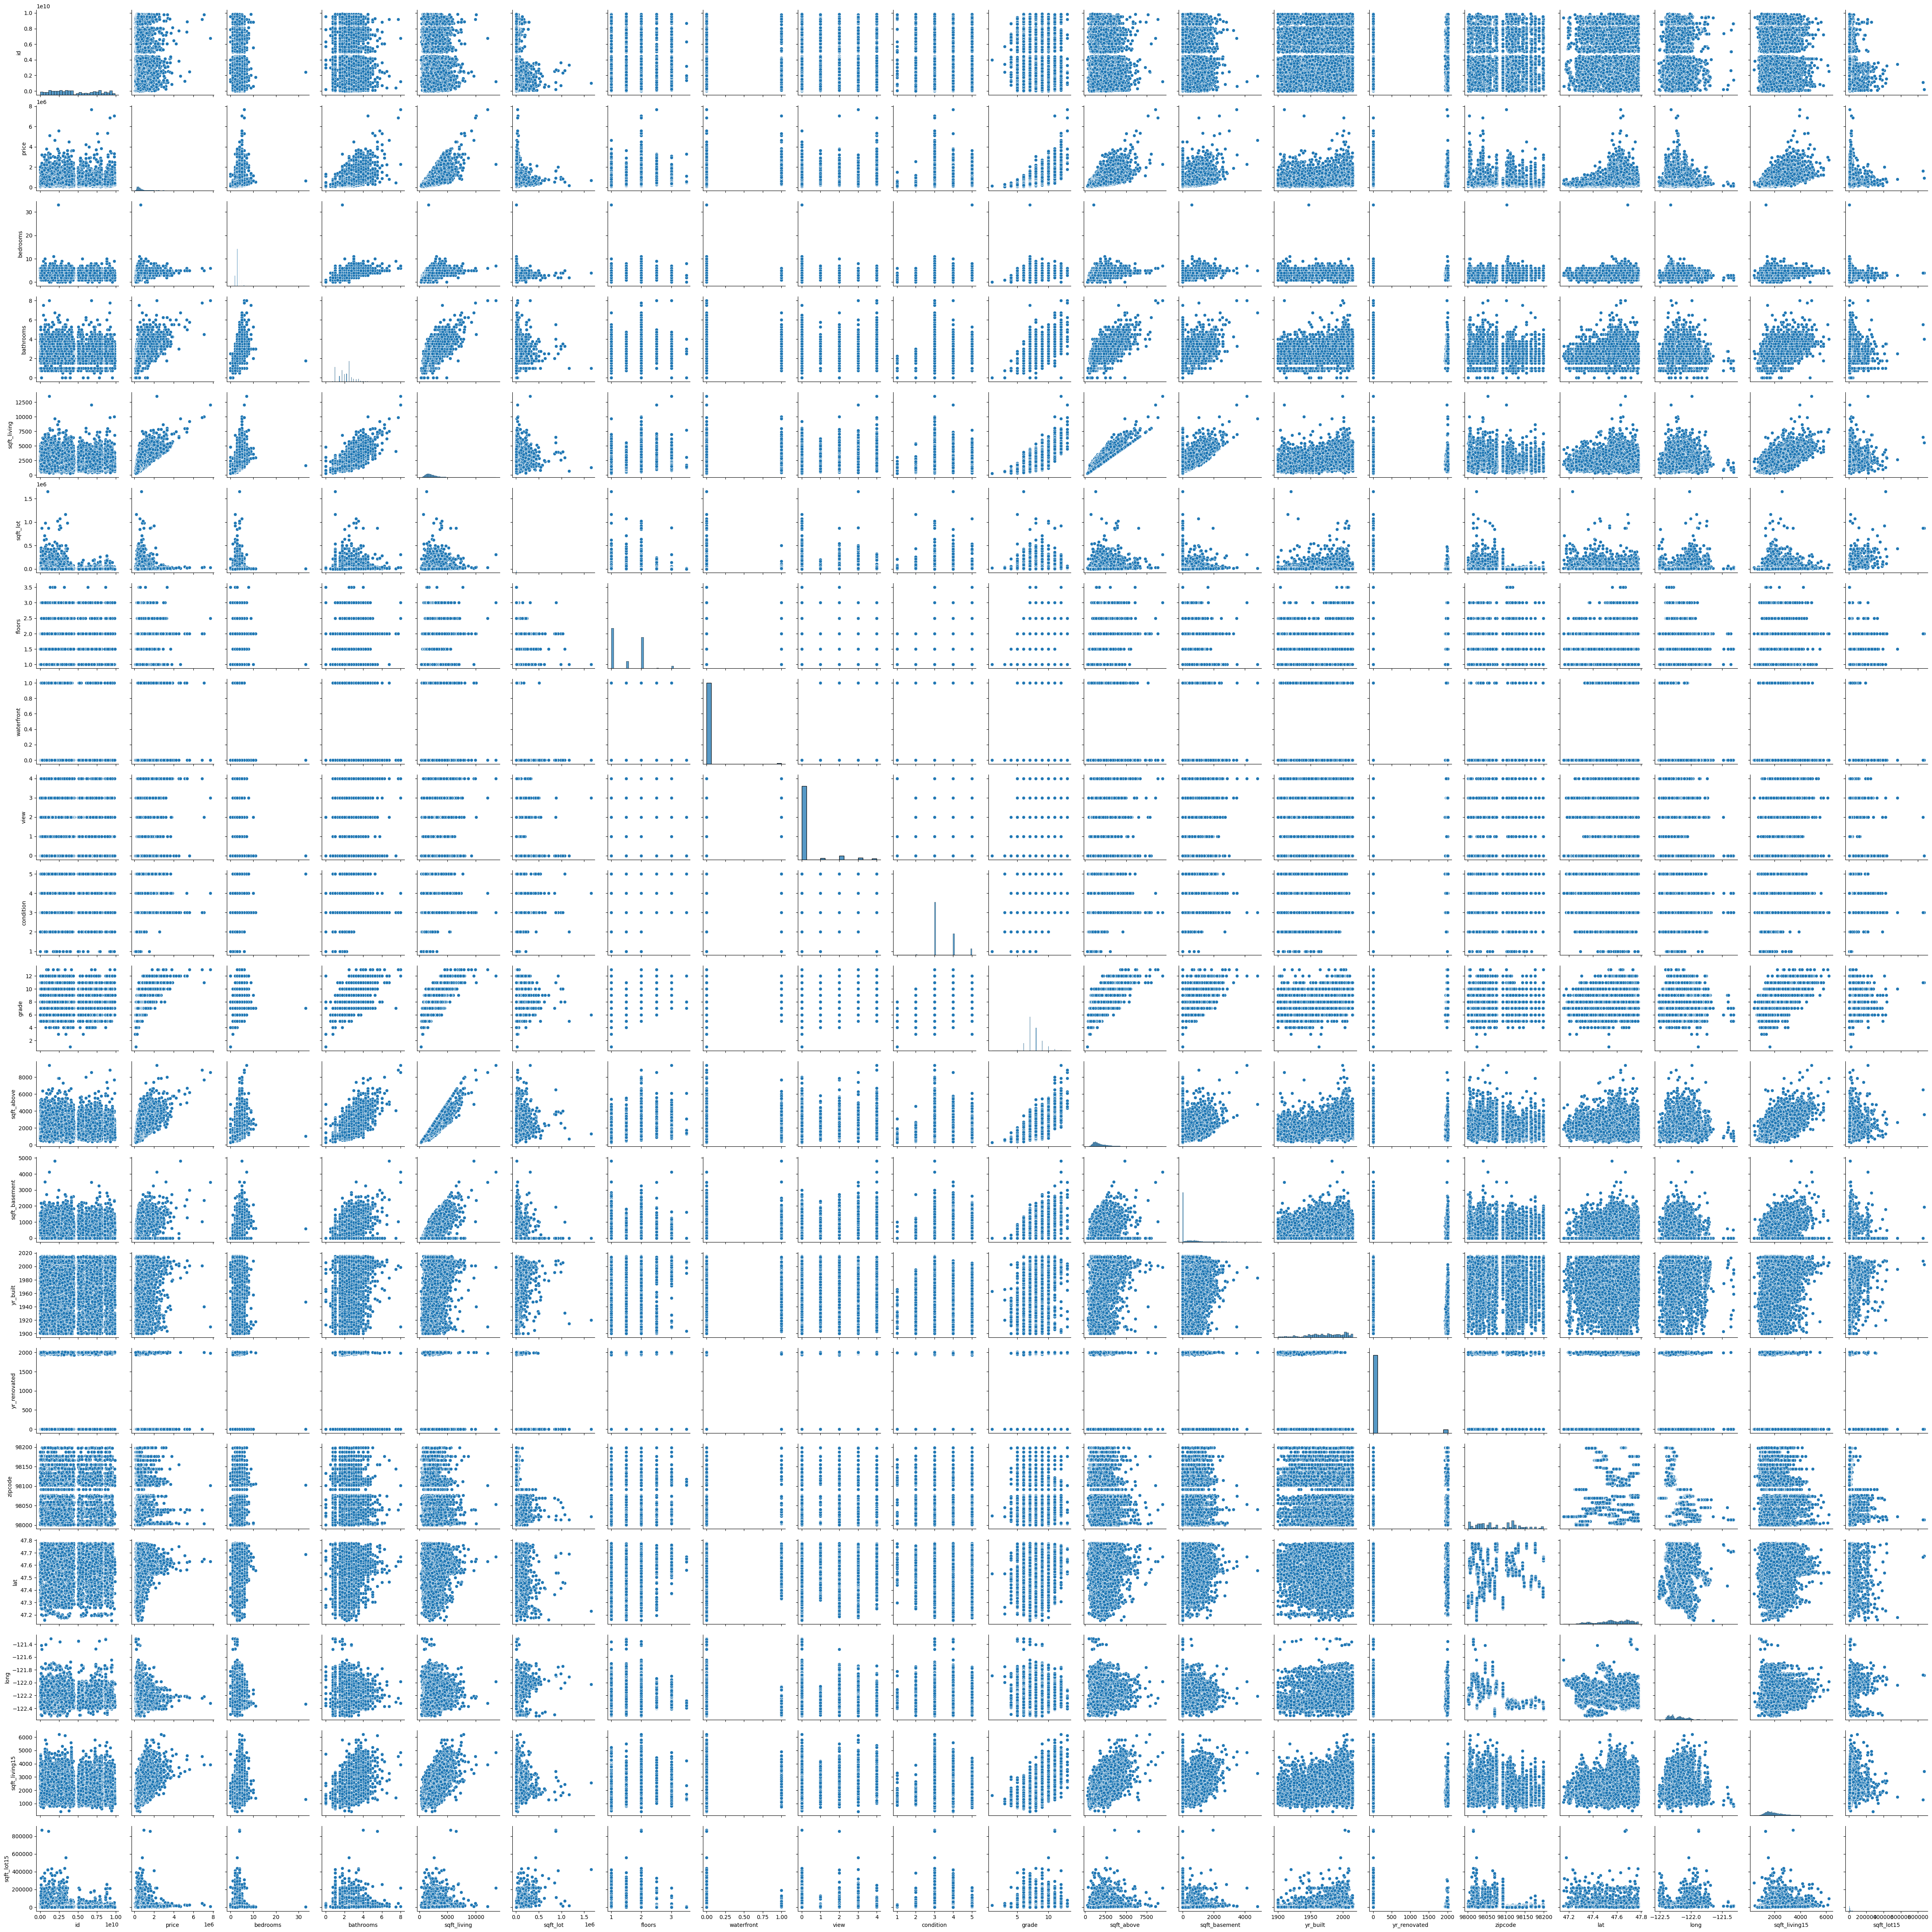

In [ ]:
sns.pairplot(houseDf)

Pair Plot with Price to other columns.

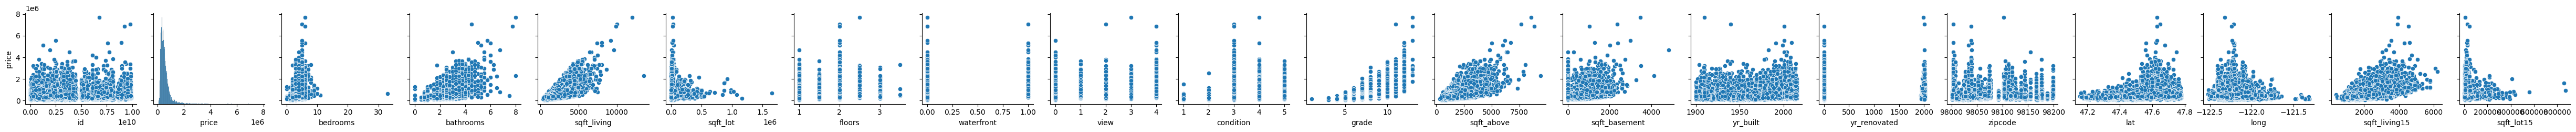

In [ ]:

sns.pairplot(houseDf, y_vars=['price'], x_vars=houseDf.select_dtypes(include=np.number).columns.tolist())

In [ ]:
houseDf['date'] = pd.to_datetime(houseDf['date'])
housedfcorr = houseDf.corr(numeric_only=True)
display(housedfcorr)

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   

                 floors  waterfront      view  condition     grade  \
id             0.018525   -0.002721  0.011592  -0.023783  0.008130   
price          0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms       0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms      0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living    0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot      -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors         1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront     0.023698    1.000000  0.401857   0.016653  0.082775   
view           0.029444    0.401857  1.000000   0.045990  0.251321   
condition     -0.263768    0.016653  0.045990   1.000000 -0.144674   
grade          0.458183    0.082775  0.251321  -0.144674  1.000000   
sqft_above     0.523885    0.072075  0.167649  -0.158214  0.755923   
sqft_basement -0.245705    0.080588  0.276947   0.174105  0.168392   
yr_built       0.489319   -0.026161 -0.053440  -0.361417  0.446963   
yr_renovated   0.006338    0.092885  0.103917  -0.060618  0.014414   
zipcode       -0.059121    0.030285  0.084827   0.003026 -0.184862   
lat            0.049614   -0.014274  0.006157  -0.014941  0.114084   
long           0.125419   -0.041910 -0.078400  -0.106500  0.198372   
sqft_living15  0.279885    0.086463  0.280439  -0.092824  0.713202   
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406  0.119248   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010842      -0.005151  0.021380     -0.016907 -0.008224   
price            0.605567       0.323816  0.054012      0.126434 -0.053203   
bedrooms         0.477600       0.303093  0.154178      0.018841 -0.152668   
bathrooms        0.685342       0.283770  0.506019      0.050739 -0.203866   
sqft_living      0.876597       0.435043  0.318049      0.055363 -0.199430   
sqft_lot         0.183512       0.015286  0.053080      0.007644 -0.129574   
floors           0.523885      -0.245705  0.489319      0.006338 -0.059121   
waterfront       0.072075       0.080588 -0.026161      0.092885  0.030285   
view             0.167649       0.276947 -0.053440      0.103917  0.084827   
condition       -0.158214       0.174105 -0.361417     -0.060618  0.

Highest correlation just base on using the dataset is Grade and Living space of the house, and Bathrooms. Which make sense.

It is going to be interesting to build model that use Zip Code to predict price.

In [ ]:
display(housedfcorr.style.background_gradient(cmap='coolwarm').format('{:.2f}'))

# 3. Modeling Requirements

## 3.1 Regularization Approach (mandatory)

Design a modeling pipeline that includes

Regression:

Ridge Regression (L2)

Lasso Regression (L1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features (X) and target (y)
X = houseDf.drop(['id', 'date', 'price'], axis=1)
y = houseDf['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing and Ridge Regression pipeline
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0)) # You can tune alpha
])

# Create a preprocessing and Lasso Regression pipeline
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=1.0)) # You can tune alpha
])

# Train the Ridge Regression pipeline
ridge_pipeline.fit(X_train, y_train)

# Predict and evaluate Ridge Regression
y_pred_ridge = ridge_pipeline.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression:")
print(f"  Mean Squared Error: {mse_ridge:.2f}")
print(f"  R-squared: {r2_ridge:.2f}")

# Train the Lasso Regression pipeline
lasso_pipeline.fit(X_train, y_train)

# Predict and evaluate Lasso Regression
y_pred_lasso = lasso_pipeline.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"\nLasso Regression:")
print(f"  Mean Squared Error: {mse_lasso:.2f}")
print(f"  R-squared: {r2_lasso:.2f}")

Ridge Regression:
  Mean Squared Error: 45173305231.10
  R-squared: 0.70

Lasso Regression:
  Mean Squared Error: 45173085031.36
  R-squared: 0.70


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.060e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(
